# Time Series Forcasting
### Problem Statement 
Forecasting the sales of a furniture store

In [109]:
# Load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller, acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.tsa.api import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [51]:
# Read the data 
store = pd.read_csv(r"D:\new Data science class\project\11. Time series\2-Projects\Dataset\Super_Store.csv")

In [52]:
# Primary data inspection 
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [53]:
# Checking the columns in dataset 
store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [54]:
# Null check 
store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

* There are no nulls in the dataset

In [55]:
# Primary data inspection 
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

* Thera are some object and some numeric columns 
* But order date column is object type and needs to be converted into datetime 

In [56]:
#Check the time spam
store['Order Date'].min(), store['Order Date'].max()

('1/1/2017', '9/9/2017')

In [57]:
# sort the data according to order date 
store.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [59]:
store = store.groupby("Order Date")['Sales'].sum().reset_index()
store.head()

,Order Date,Sales
0,1/1/2017,975.490
1,1/10/2014,51.940
2,1/10/2015,1018.104
3,1/10/2016,104.770
4,1/11/2014,9.940


In [60]:
# changing order date  to datetime  
store["Order Date"]= pd.to_datetime(store["Order Date"])

In [61]:
# changing the index of data to order date 
store.set_index("Order Date", inplace = True)

In [62]:
# selecting only sales column for analysis
store_new = store[["Sales"]]

In [65]:
y = store["Sales"].resample('MS').mean()

In [104]:
y = pd.DataFrame(y,columns=["Sales"])
y.head

<bound method NDFrame.head of                   Sales
Order Date             
2014-01-01   480.194231
2014-02-01   367.931600
2014-03-01   857.291529
2014-04-01   567.488357
2014-05-01   432.049187
2014-06-01   695.059242
2014-07-01   601.169500
2014-08-01   457.521656
2014-09-01   992.353367
2014-10-01   769.015437
2014-11-01   980.221486
2014-12-01  1532.298325
2015-01-01   978.328467
2015-02-01   522.395667
2015-03-01   781.236437
2015-04-01   805.822962
2015-05-01   624.996700
2015-06-01   428.565500
2015-07-01   719.706316
2015-08-01   602.412012
2015-09-01  1382.790684
2015-10-01   632.980184
2015-11-01  1286.701354
2015-12-01  1049.355418
2016-01-01   508.182867
2016-02-01   356.868273
2016-03-01   609.575810
2016-04-01   695.373158
2016-05-01   687.265227
2016-06-01   816.910750
2016-07-01   768.736412
2016-08-01   734.307782
2016-09-01  1135.953371
2016-10-01   624.872474
2016-11-01  1271.345152
2016-12-01  1410.719808
2017-01-01   397.602133
2017-02-01   528.179800
2017-03-01

### Decomposition of time series data 

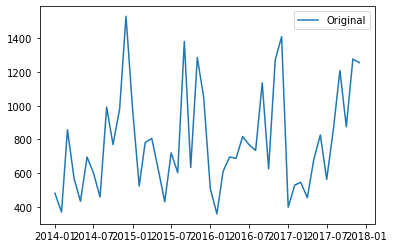

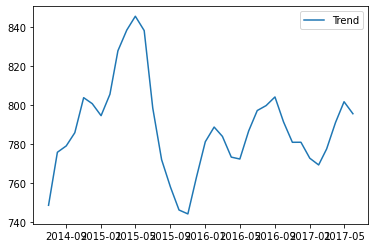

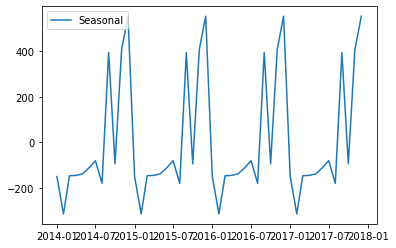

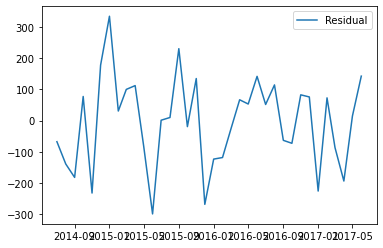

In [68]:
decomposition = seasonal_decompose(y)
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')


trend  = decomposition.trend
plt.show()
plt.plot(trend, label = "Trend")
plt.legend(loc  = "best")

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

* It is clear from above graph that sales has no trend
* but it has seasonality

### Check for stationarity - Adfuller test  

In [73]:
# Adfuller Test 
p_value = adfuller(y)[1]
if (p_value < 0.05):
    print("Time series is stationary. Proced to model building")
else:
    print("time series is not stationary. Differncing of data is required.")


Time series is stationary. Proced to model building


### Plotting ACF and PACF plots 

In [74]:
# plotting ACF Aand PACF graph to get values of q and p 
lags = 20 
pacf_lags = pacf(y,nlags = lags, method = "ols")
acf_lags = acf(y,nlags = lags)
lag_coeff=np.arange(lags+1)

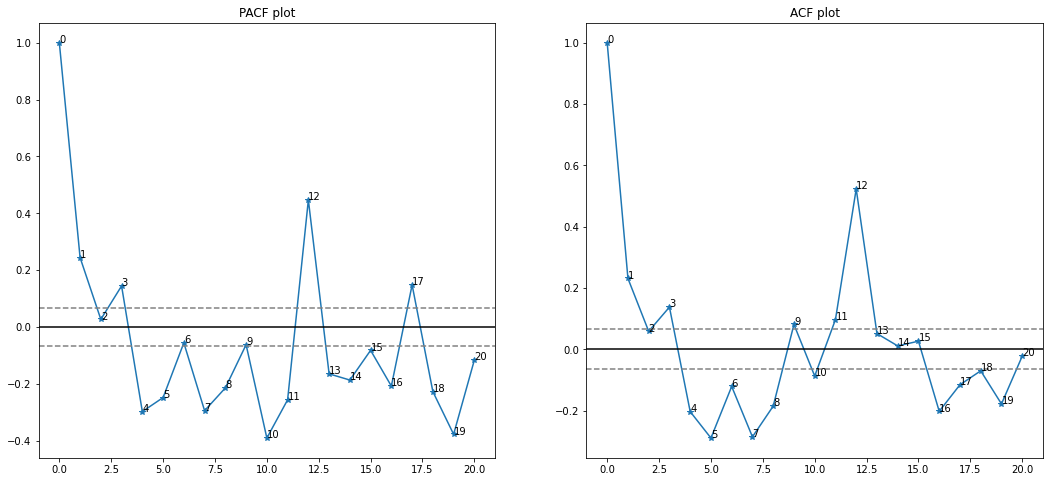

In [75]:
# Plots
# PACF Plot
plt.figure(figsize=(18,8))
plt.subplot(121)
ax1=plt.plot(pacf_lags,marker='*')
plt.axhline(y=0,lineStyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(store_new)),linestyle='--',color='gray')
plt.axhline(y= 1.96/np.sqrt(len(store_new)),linestyle='--',color='gray')
plt.title('PACF plot')
for a,b in zip(lag_coeff,pacf_lags):
    plt.text(a,b,str(a))

#PACF Plot
plt.subplot(122)
ax2=plt.plot(acf_lags,marker='*')
plt.axhline(y=0,lineStyle='-',color='black')
plt.axhline(y=(-1.96/(np.sqrt(len(store_new)))),linestyle='--',color='gray')
plt.axhline(y=(1.96/(np.sqrt(len(store_new)))),linestyle='--',color='gray')
plt.title('ACF plot')
for a,b in zip(lag_coeff,acf_lags):
    plt.text(a,b,str(a))

### Build ARIMA model 

In [79]:
# From plot of PACF and ACF we get different values of p and q
p_list=[1,3] # From PACF plot
q_list=[1]
d=0 # as data statinory no differencing needed.

# build the ARIMA model
for p in p_list:
    for q in q_list:
        m1=ARIMA(y,order=(p,d,q)).fit()
        # Check every model if its good or bad by Ljung-box test
        pvalue=sm.stats.acorr_ljungbox(m1.resid,1)[1] # 1 is lag and 1 location for p value as output
        
        if pvalue < 0.05:
            print('Bad Model.\nparameters are p={},q={}'.format(p,q))
        else:
            print('GOOD MODEL.\nparameters are p={},q={}'.format(p,q))
        
        print("p-Value={}\nAIC={}\nBIC={}\n".format(pvalue,m1.aic,m1.bic))

GOOD MODEL.
parameters are p=1,q=1
p-Value=[0.99048003]
AIC=690.1031308683033
BIC=697.5879349119349

GOOD MODEL.
parameters are p=3,q=1
p-Value=[0.86490526]
AIC=692.3792469781208
BIC=703.6064530435682



In [81]:
# creating  train data and test data for testing model accuracy 
print('shape of data is ',y.shape)
train_data=y.head(40)
test_data=y.tail(8)
print('shape of train data is ',train_data.shape)
print('shape of test data is ',test_data.shape)

shape of data is  (48,)
shape of train data is  (40,)
shape of test data is  (8,)


In [83]:
train_data.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049187
Freq: MS, Name: Sales, dtype: float64

In [86]:
# I took p=1 and q=1 when d=0 for model building as it has lowest AIC, BIC score
model1=ARIMA(train_data,order=(1,0,1)).fit()

In [87]:
# forecasting  
preds = model1.forecast(steps=8)
print(preds[0])

[720.95970102 762.97896159 747.47603886 753.19581141 751.08551269
 751.86410321 751.57684378 751.68282758]


In [114]:
# RMSE Of model :
mse=mean_squared_error(test_data,preds[0])
print('RMSE Of model = {:.3f}'.format(np.sqrt(mse)))


RMSE Of model = 317.802


## Smoothning techniques:
### 1. Moving Average

In [105]:
# 1.moving average:
lags=5
moving_Avg_10=y.rolling(window=lags).mean()
print(moving_Avg_10)

                  Sales
Order Date             
2014-01-01          NaN
2014-02-01          NaN
2014-03-01          NaN
2014-04-01          NaN
2014-05-01   540.990981
2014-06-01   583.963983
2014-07-01   630.611563
2014-08-01   550.657589
2014-09-01   635.630591
2014-10-01   703.023841
2014-11-01   760.056289
2014-12-01   946.282054
2015-01-01  1050.443416
2015-02-01   956.451876
2015-03-01   958.896076
2015-04-01   924.016371
2015-05-01   742.556046
2015-06-01   632.603453
2015-07-01   672.065583
2015-08-01   636.300698
2015-09-01   751.694242
2015-10-01   753.290939
2015-11-01   924.918110
2015-12-01   990.847931
2016-01-01   972.002101
2016-02-01   766.817619
2016-03-01   762.136744
2016-04-01   643.871105
2016-05-01   571.453067
2016-06-01   633.198643
2016-07-01   715.572271
2016-08-01   740.518666
2016-09-01   828.634708
2016-10-01   816.156158
2016-11-01   907.043038
2016-12-01  1035.439717
2017-01-01   968.098588
2017-02-01   846.543873
2017-03-01   830.503827
2017-04-01   666

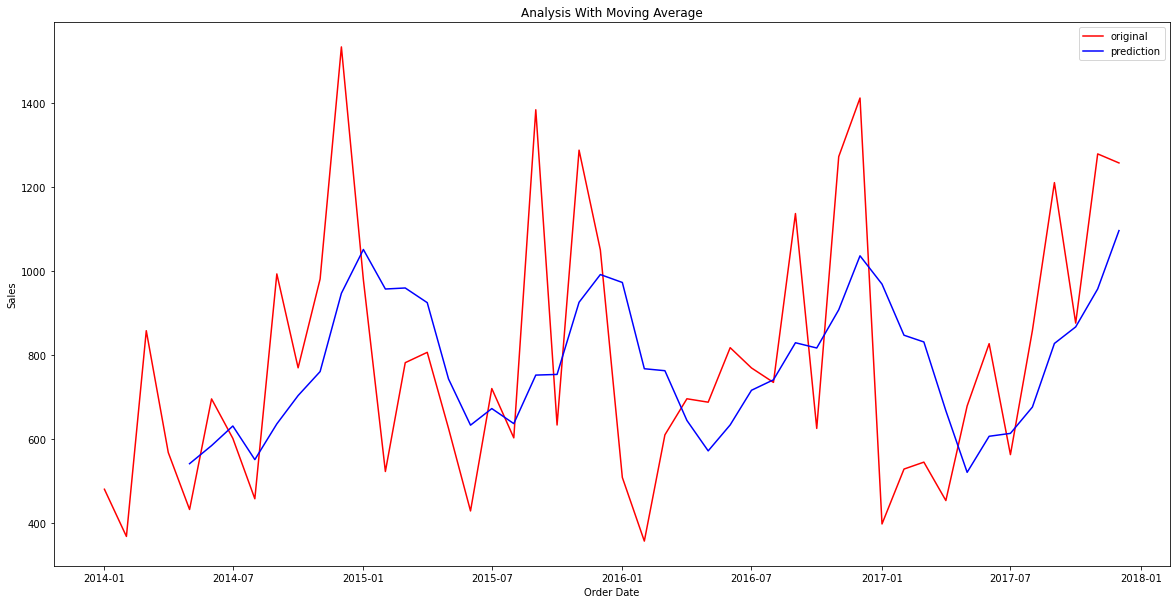

In [135]:
# Compairing actual vs moving average data 
plt.figure(figsize=(20,10))
sns.lineplot(y.index,y.Sales,color='r',label='original')
sns.lineplot(y.index,moving_Avg_10.Sales,color='b',label='prediction')
plt.title('Analysis With Moving Average')
plt.legend()

### 2. Exponential smoothning
#### Simple smothning

In [112]:
# Simple smoothning: Need Alpha Value-
def simplesmoothning(data,alpha):
    model=SimpleExpSmoothing(data).fit(smoothing_level=alpha)
    preds=model.fittedvalues
    df=pd.DataFrame({'actual':y.Sales,'prediction':preds})
    RMSE=np.sqrt(mean_squared_error(df.actual,df.prediction))
    print("RMSE from this alpha =",RMSE)
    print()
    return(model,df)

In [113]:
# Building model at diff. alpha:
exp_m1,df1=simplesmoothning(y,0.2)
print(df1)
f1=df1.prediction

RMSE from this alpha = 312.2481522648763

                 actual  prediction
Order Date                         
2014-01-01   480.194231  607.743042
2014-02-01   367.931600  582.233280
2014-03-01   857.291529  539.372944
2014-04-01   567.488357  602.956661
2014-05-01   432.049187  595.863000
2014-06-01   695.059242  563.100238
2014-07-01   601.169500  589.492038
2014-08-01   457.521656  591.827531
2014-09-01   992.353367  564.966356
2014-10-01   769.015437  650.443758
2014-11-01   980.221486  674.158094
2014-12-01  1532.298325  735.370772
2015-01-01   978.328467  894.756283
2015-02-01   522.395667  911.470720
2015-03-01   781.236437  833.655709
2015-04-01   805.822962  823.171855
2015-05-01   624.996700  819.702076
2015-06-01   428.565500  780.761001
2015-07-01   719.706316  710.321901
2015-08-01   602.412012  712.198784
2015-09-01  1382.790684  690.241429
2015-10-01   632.980184  828.751280
2015-11-01  1286.701354  789.597061
2015-12-01  1049.355418  889.017920
2016-01-01   508.18286

In [115]:
exp_m2,df2=simplesmoothning(y,0.75)
f2=df2.prediction

RMSE from this alpha = 336.45366800691585



In [121]:
exp_m3,df3=simplesmoothning(y,1.4)
f3=df3.prediction

RMSE from this alpha = 449.2325937261689



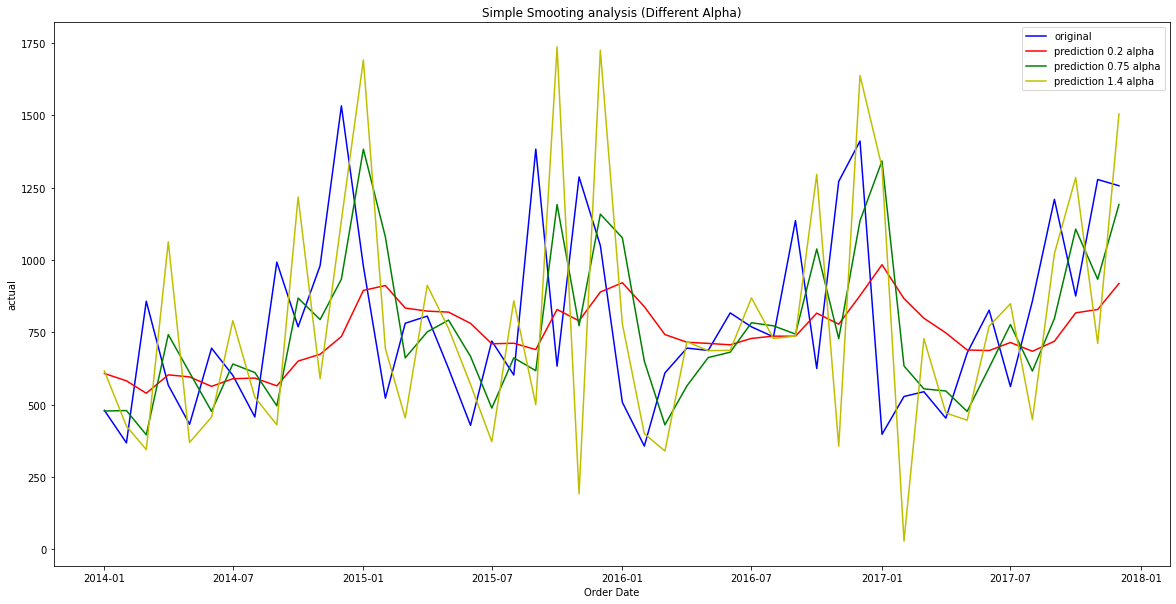

In [122]:
plt.figure(figsize=(20,10))
sns.lineplot(df1.index,df1.actual,color='b',label='original')
sns.lineplot(df1.index,df1.prediction,color='r',label='prediction 0.2 alpha')
sns.lineplot(df1.index,df2.prediction,color='g',label='prediction 0.75 alpha')
sns.lineplot(df1.index,df3.prediction,color='y',label='prediction 1.4 alpha')
plt.title('Simple Smooting analysis (Different Alpha)')
plt.show()

In [123]:
# forcasting using alpha 0.2
print(exp_m1.forecast(8))

2018-01-01    986.120365
2018-02-01    986.120365
2018-03-01    986.120365
2018-04-01    986.120365
2018-05-01    986.120365
2018-06-01    986.120365
2018-07-01    986.120365
2018-08-01    986.120365
Freq: MS, dtype: float64


* Simple smooting method gives low RMSE but results looks to be grouped.

#### Double Exponential smothening - Holtz Winter Method

In [124]:
# Holtz Method : Trend but no Seasonality.
#( Alpha And Beta Parametrs)
def doublesmoothing(data,alpha,beta,trend='additive'):
    model=ExponentialSmoothing(data,trend=trend).fit(smoothing_level=alpha,smoothing_slope=beta)
    preds=model.fittedvalues
    df=pd.DataFrame({'actual':y.Sales,'prediction':preds})
    RMSE=np.sqrt(mean_squared_error(df.actual,df.prediction))
    print("RMSE from this alpha =",RMSE)
    return(model,df)

In [125]:
dexp_m4,df4=doublesmoothing(y,0.25,0.65)

RMSE from this alpha = 391.6924875885027


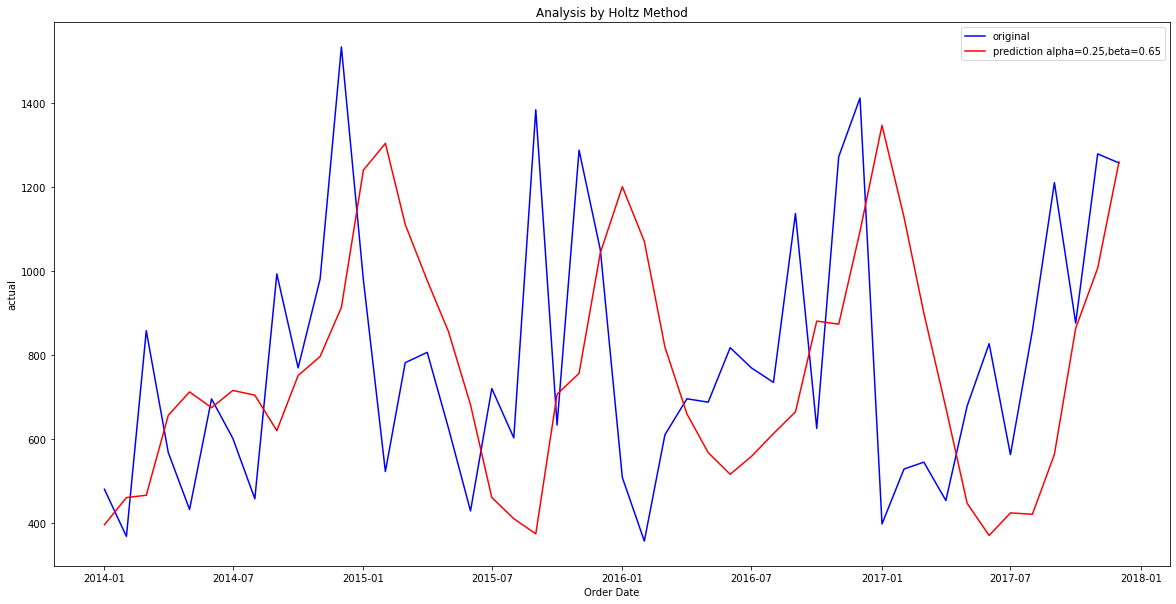

In [126]:
plt.figure(figsize=(20,10))
sns.lineplot(df4.index,df4.actual,color='b',label='original')
sns.lineplot(df4.index,df4.prediction,color='r',label='prediction alpha=0.25,beta=0.65')
plt.title('Analysis by Holtz Method')
plt.show()

In [127]:
# Forcast on double exponential smoothning - holtz method
dexp_m4.forecast(8)

2018-01-01    1441.988979
2018-02-01    1625.970943
2018-03-01    1809.952907
2018-04-01    1993.934871
2018-05-01    2177.916834
2018-06-01    2361.898798
2018-07-01    2545.880762
2018-08-01    2729.862726
Freq: MS, dtype: float64

#### Triple Exponential smothening - Holtz Winter method 

In [128]:
# Holtz Winter Method  : when data has trend and seasonality :
def triplesmoothing(data,trend='add',seasonal='add'):
    model=ExponentialSmoothing(data,trend=trend,seasonal=seasonal,seasonal_periods=12).fit()
    preds=model.fittedvalues
    df=pd.DataFrame({'actual':y.Sales,'prediction':preds})
    RMSE=np.sqrt(mean_squared_error(df.actual,df.prediction))
    print("RMSE from this alpha =",RMSE)
    return(model,df)

In [129]:
texp_m5,df5=triplesmoothing(y)

RMSE from this alpha = 186.8552532398157


Text(0.5, 1.0, 'Analysis by Holtz Winter Method')

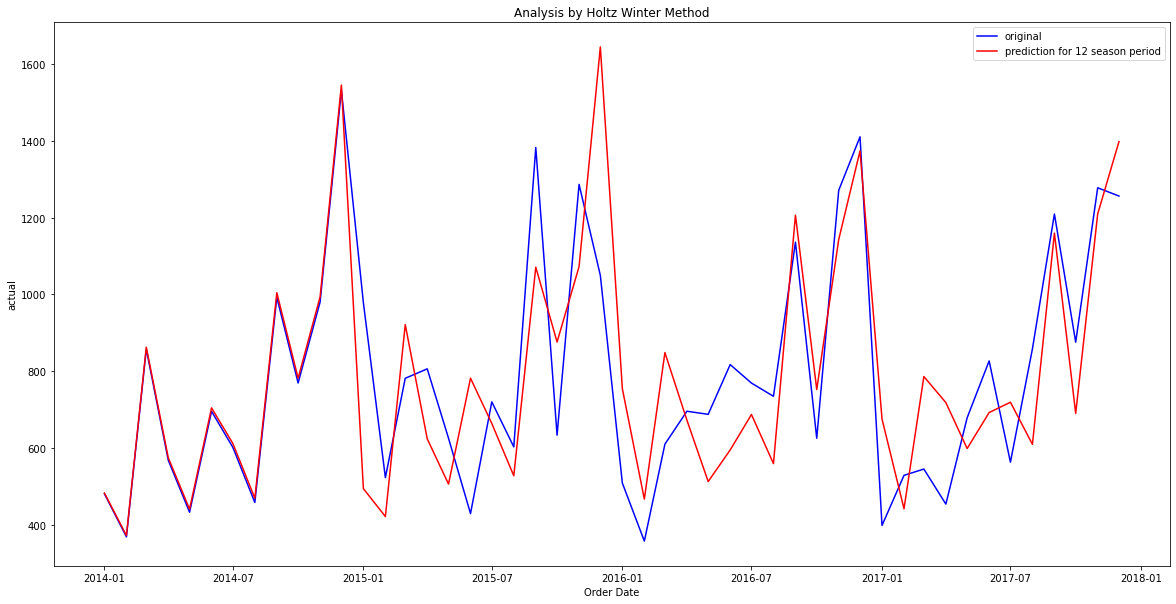

In [131]:
plt.figure(figsize=(20,10))
sns.lineplot(df5.index,df5.actual,color='b',label='original')
sns.lineplot(df5.index,df5.prediction,color='r',label='prediction for 12 season period')
plt.title('Analysis by Holtz Winter Method')

In [132]:
# Forcast for next 12 months
texp_m5.forecast(12)

2018-01-01     555.639592
2018-02-01     492.701748
2018-03-01     695.786391
2018-04-01     637.475139
2018-05-01     681.410242
2018-06-01     793.064541
2018-07-01     691.283720
2018-08-01     761.593186
2018-09-01    1212.093344
2018-10-01     794.621606
2018-11-01    1251.828119
2018-12-01    1406.552917
Freq: MS, dtype: float64

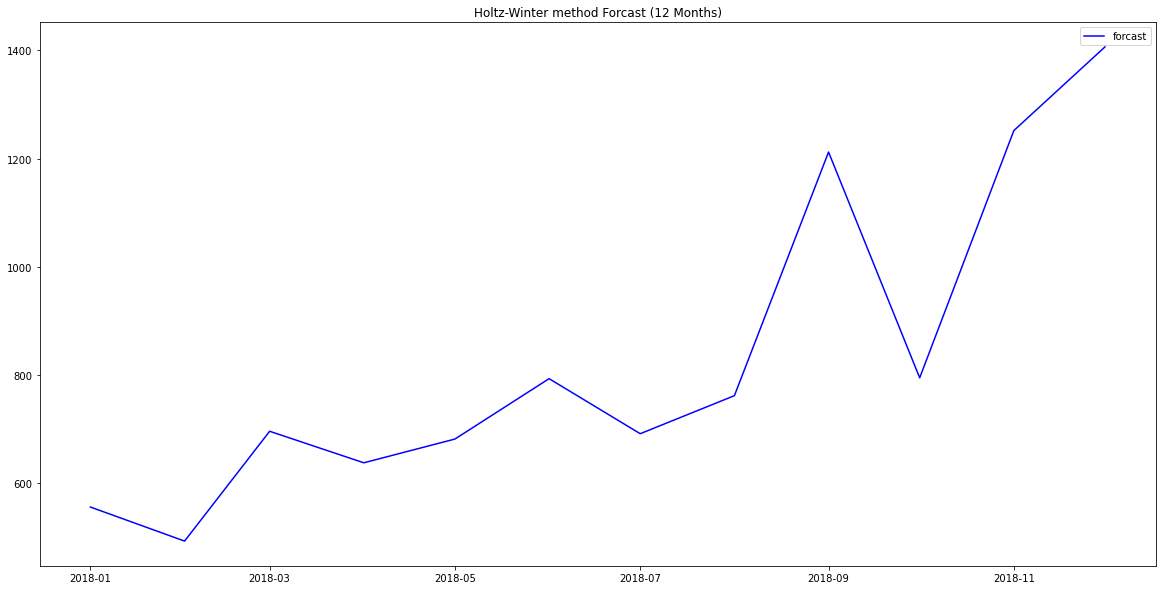

In [134]:
# Plot for next forcast
plt.figure(figsize=(20,10))
sns.lineplot(texp_m5.forecast(12).index,texp_m5.forecast(12).values,color='b',label='forcast')
plt.title('Holtz-Winter method Forcast (12 Months)')
plt.show()